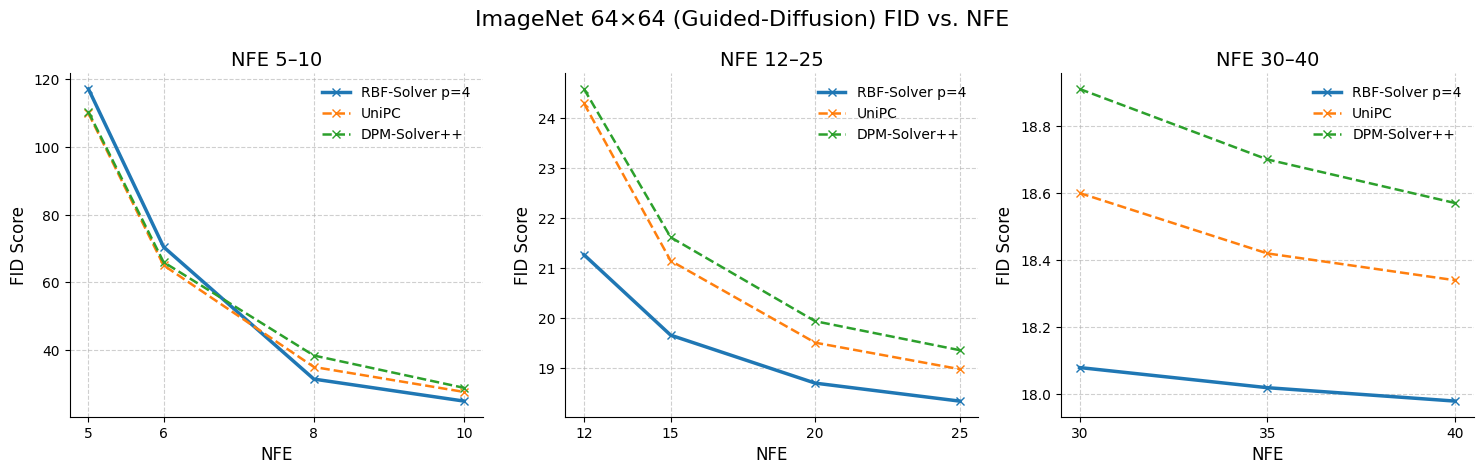

In [11]:
import matplotlib.pyplot as plt

# ---------- Raw data ----------
nfe_all = [5, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40]

data = {
    "RBF-Solver p=4": [117.01, 70.47, 31.54, 25.05, 21.27, 19.66, 18.70, 18.34, 18.08, 18.02, 17.98],
    "UniPC":          [109.81, 65.06, 35.11, 27.75, 24.30, 21.15, 19.51, 18.98, 18.60, 18.42, 18.34],
    "DPM-Solver++":   [110.23, 66.00, 38.48, 28.95, 24.59, 21.62, 19.94, 19.36, 18.91, 18.70, 18.57],
    #"RBF-Solver p=3": [116.83, 70.48, 34.53, 26.21, 22.64, 20.89, 19.30, 18.73, 18.32, 18.17, 18.07],
    
}

# ---------- NFE groups ----------
groups = [
    ("NFE 5–10",  [5, 6, 8, 10],  slice(0, 4)),
    ("NFE 12–25", [12, 15, 20, 25], slice(4, 8)),
    ("NFE 30–40", [30, 35, 40],     slice(8, 11)),
]

# ---------- Style ----------
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

# ---------- Figure ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5), sharey=False)

for ax, (title, nfe_subset, slc) in zip(axs, groups):
    for model, vals in data.items():
        segment = vals[slc]
        lw = 2.5 if model.startswith("RBF") else 1.8
        ls = '-' if model.startswith("RBF") else '--'
        ax.plot(nfe_subset, segment, marker='x', linewidth=lw, linestyle=ls, label=model)
    ax.set_title(title)
    ax.set_xlabel("NFE")
    ax.set_ylabel("FID Score")
    ax.set_xticks(nfe_subset)
    # Legend in each subplot
    ax.legend(frameon=False, loc="upper right")

plt.tight_layout()
plt.suptitle("ImageNet 64×64 (Guided-Diffusion) FID vs. NFE", fontsize=16, y=1.05)
plt.show()
